In [2]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [3]:
from langchain.tools import tool
@tool
def get_weather(location:str)->str:
    """Get the weather at a location"""
    return f"It's sunny in {location}"

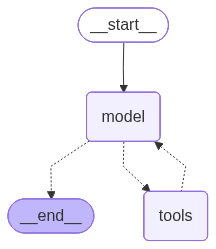

In [4]:
from langchain.agents import create_agent
agent=create_agent(
    model="gpt-5",
    tools=[get_weather],
    
    system_prompt="You are a helpful assistant"
)

agent

In [5]:
response=agent.invoke({"messages":[{"role":"user","content":"What is the weather like in Kolkata"}]})
print(response)

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-or-v1*************************************************************fcd9. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'code': 'invalid_api_key', 'param': None}, 'status': 401}